        Date  Prix action  Prix option strike 6  Prix option strike 6,5
0 2017-10-02        6.742                   NaN                     NaN
1 2017-10-03        6.955                   NaN                     NaN
2 2017-10-04        6.910               1.02096                 0.59093
3 2017-10-05        7.006               1.09932                 0.65885
4 2017-10-06        7.000               1.09306                 0.65440
          Date  Prix action  Prix option strike 6  Prix option strike 6,5  \
0   2017-10-02        6.742                   NaN                     NaN   
1   2017-10-03        6.955                   NaN                     NaN   
2   2017-10-04        6.910               1.02096                 0.59093   
3   2017-10-05        7.006               1.09932                 0.65885   
4   2017-10-06        7.000               1.09306                 0.65440   
..         ...          ...                   ...                     ...   
252 2018-09-27        6.028  

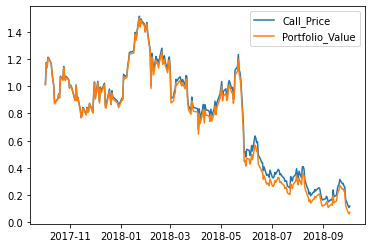

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",Time_to_Maturity,Call_Price,Delta,poche_actions,poche_ZC,Portfolio_Value
0,2017-10-02,6.742,NaN,NaN,1.245722,1.012292,0.736942,4.968460,-3.956168,1.012292
1,2017-10-03,6.955,NaN,NaN,1.242984,1.173475,0.780502,5.428395,-4.259134,1.169260
2,2017-10-04,6.910,1.02096,0.59093,1.240246,1.138034,0.771972,5.334324,-4.200187,1.134138
3,2017-10-05,7.006,1.09932,0.65885,1.237509,1.212534,0.790440,5.537820,-4.329573,1.208247
4,2017-10-06,7.000,1.09306,0.65440,1.234771,1.207297,0.789516,5.526609,-4.323104,1.203504
...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.260096,0.258869,0.538496,3.246053,-3.023648,0.222405
253,2018-09-28,5.844,0.28498,0.19737,0.257358,0.169626,0.417257,2.438449,-2.315128,0.123322
254,2018-10-01,5.724,0.24261,0.16974,0.249144,0.120829,0.336582,1.926595,-1.853344,0.073251
255,2018-10-02,5.690,0.24491,0.17452,0.246407,0.108641,0.313942,1.786330,-1.724523,0.061807


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime       
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

################################# QUESTION 1 #################################
df = pd.read_excel('Données TD3.xlsx', parse_dates=['Date'], skiprows=2)

print(df.head())

K = 6
Vol = 0.20  
Rf = 0.00
maturity_date = datetime(2018, 12, 31)

df['Time_to_Maturity'] = (maturity_date - df['Date']).dt.days / 365.25

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    delta = norm.cdf(d1)
    return call_price, delta

df['Call_Price'] = np.nan
df['Delta'] = np.nan

for i in range(len(df)):
    S = df.loc[i, 'Prix action']
    T = df.loc[i, 'Time_to_Maturity']
    if T > 0:
        call_price, delta = black_scholes_call_price(S, K, T, Rf, Vol)
        df.at[i, 'Call_Price'] = call_price
        df.at[i, 'Delta'] = delta

df['poche_actions'] = np.nan
df['poche_ZC'] = np.nan
df['Portfolio_Value'] = np.nan


df['poche_actions'][0] = df['Delta'][0] * df['Prix action'][0]
df['poche_ZC'][0] = df['Call_Price'][0] - df['poche_actions'][0]
df['Portfolio_Value'][0] = df['Call_Price'][0]

for i in range(1, len(df)):
    df['poche_actions'][i] = df['Delta'][i] * df['Prix action'][i]
    df['Portfolio_Value'][i] = df['Portfolio_Value'][i-1] + df['Delta'][i - 1] * (df['Prix action'][i] - df['Prix action'][i - 1])
    df['poche_ZC'][i] = df['Portfolio_Value'][i] - df['poche_actions'][i]


print(df)

#plt.plot(df['Date'], df['poche_actions'], label='poche_actions')
#plt.plot(df['Date'], df['poche_ZC'], label='poche_ZC')
plt.plot(df['Date'], df['Call_Price'], label='Call_Price')
plt.plot(df['Date'], df['Portfolio_Value'], label='Portfolio_Value')
plt.legend()
plt.show()

df





        Date  Prix action  Prix option strike 6  Prix option strike 6,5
0 2017-10-02        6.742                   NaN                     NaN
1 2017-10-03        6.955                   NaN                     NaN
2 2017-10-04        6.910               1.02096                 0.59093
3 2017-10-05        7.006               1.09932                 0.65885
4 2017-10-06        7.000               1.09306                 0.65440
          Date  Prix action  Prix option strike 6  Prix option strike 6,5  \
0   2017-10-02        6.742                   NaN                     NaN   
1   2017-10-03        6.955                   NaN                     NaN   
2   2017-10-04        6.910               1.02096                 0.59093   
3   2017-10-05        7.006               1.09932                 0.65885   
4   2017-10-06        7.000               1.09306                 0.65440   
..         ...          ...                   ...                     ...   
252 2018-09-27        6.028  

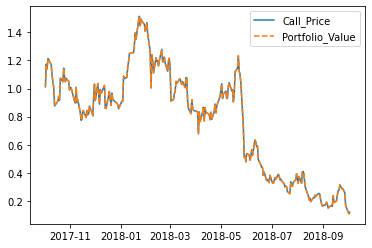

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

################################# QUESTION 2 #################################
df = pd.read_excel('Données TD3.xlsx', parse_dates=['Date'], skiprows=2)

print(df.head())

K1 = 6
K2 = 6.5
Vol = 0.20  
Rf = 0.00
maturity_date = datetime(2018, 12, 31)

df['Time_to_Maturity'] = (maturity_date - df['Date']).dt.days / 365.25

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return call_price, delta, gamma

df['Call_Price'] = np.nan
df['Delta'] = np.nan

for i in range(len(df)):
    S = df.loc[i, 'Prix action']
    T = df.loc[i, 'Time_to_Maturity']
    if T > 0:
        call_price1, delta1, gamma1 = black_scholes_call_price(S, K1, T, Rf, Vol)
        df.at[i, 'Call_Price1'] = call_price1
        df.at[i, 'Delta1'] = delta1
        df.at[i, 'Gamma1'] = gamma1
        
        call_price2, delta2, gamma2 = black_scholes_call_price(S, K2, T, Rf, Vol)
        df.at[i, 'Call_Price2'] = call_price2
        df.at[i, 'Delta2'] = delta2
        df.at[i, 'Gamma2'] = gamma2

df['W2'] = df['Gamma1'] / df['Gamma2']
df['W1'] = df['Delta1'] - df['Delta2'] * df['Gamma1'] / df['Gamma2']
df['poche_actions'] = np.nan
df['poche_ZC'] = np.nan
df['poche_option2'] = np.nan
df['Portfolio_Value'] = np.nan


df['poche_actions'][0] =  df['W1'][0] * df['Prix action'][0]
df['poche_ZC'][0] = df['Call_Price1'][0] - df['W1'][0] * df['Prix action'][0] - df['W2'][0] * df['Call_Price2'][0]
df['poche_option2'][0] = df['W2'][0] * df['Call_Price2'][0]
df['Portfolio_Value'][0] = df['Call_Price1'][0] 

for i in range(1, len(df)):
    df['poche_actions'][i] = df['W1'][i] * df['Prix action'][i]
    df['Portfolio_Value'][i] = df['Portfolio_Value'][i-1] + df['W1'][i - 1] * (df['Prix action'][i] - df['Prix action'][i - 1]) + df['W2'][i - 1] * (df['Call_Price2'][i] - df['Call_Price2'][i - 1])
    df['poche_option2'][i] = df['W2'][i] * df['Call_Price2'][i]
    df['poche_ZC'][i] = df['Portfolio_Value'][i] - df['poche_actions'][i] - df['poche_option2'][i]


print(df)

#plt.plot(df['Date'], df['poche_actions'], label='poche_actions')
#plt.plot(df['Date'], df['poche_ZC'], label='poche_ZC')
plt.plot(df['Date'], df['Call_Price1'], label='Call_Price')
plt.plot(df['Date'], df['Portfolio_Value'], label='Portfolio_Value', linestyle='--')
#plt.plot(df['Date'], df['poche_option2'], label='poche_option2')
plt.legend()
plt.show()




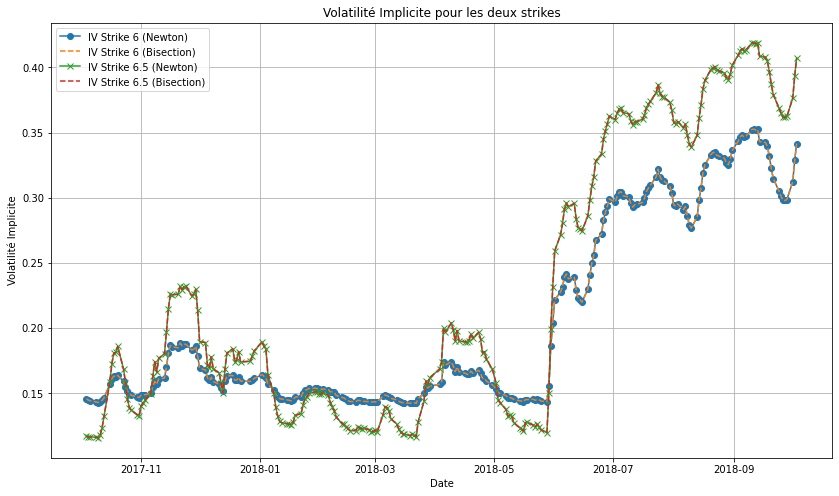

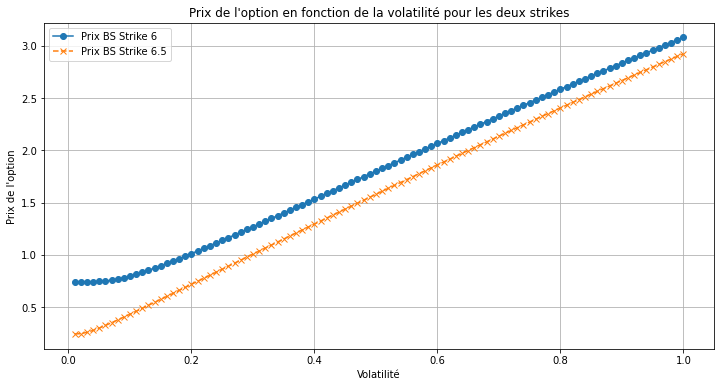

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",Time_to_Maturity,IV_Strike_6_Newton,IV_Strike_6_Bisection,IV_Strike_6.5_Newton,IV_Strike_6.5_Bisection
0,2017-10-02,6.742,NaN,NaN,1.245722,NaN,NaN,NaN,NaN
1,2017-10-03,6.955,NaN,NaN,1.242984,NaN,NaN,NaN,NaN
2,2017-10-04,6.910,1.02096,0.59093,1.240246,0.145910,0.145910,0.117007,0.117008
3,2017-10-05,7.006,1.09932,0.65885,1.237509,0.144838,0.144838,0.116605,0.116605
4,2017-10-06,7.000,1.09306,0.65440,1.234771,0.144360,0.144360,0.116727,0.116727
...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.260096,0.297915,0.297915,0.361531,0.361531
253,2018-09-28,5.844,0.28498,0.19737,0.257358,0.298651,0.298651,0.362378,0.362377
254,2018-10-01,5.724,0.24261,0.16974,0.249144,0.312279,0.312279,0.376253,0.376254
255,2018-10-02,5.690,0.24491,0.17452,0.246407,0.328700,0.328699,0.393330,0.393331


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

################################# QUESTION 4 #################################


def black_scholes_call_price(S, K, T, r, sigma):
    if T <= 0:
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def implied_vol_newton_raphson(S, K, T, r, market_price, tol=1e-6, max_iter=100):
    sigma = 0.2
    for i in range(max_iter):
        price = black_scholes_call_price(S, K, T, r, sigma)
        vega = (S * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) 
                * np.sqrt(T))
        diff = price - market_price
        if abs(diff) < tol:
            return sigma
        sigma -= diff / vega  
    return np.nan


def implied_vol_bisection(S, K, T, r, market_price, tol=1e-6, max_iter=100):
    low, high = 0.01, 1.0  
    for i in range(max_iter):
        sigma = (low + high) / 2
        price = black_scholes_call_price(S, K, T, r, sigma)
        if abs(price - market_price) < tol:
            return sigma
        if price > market_price:
            high = sigma
        else:
            low = sigma
    return np.nan


df = pd.read_excel('Données TD3.xlsx', parse_dates=['Date'], skiprows=2)
Rf = 0.00 
maturity_date = pd.to_datetime("2018-12-31")

df["Time_to_Maturity"] = (maturity_date - df["Date"]).dt.days / 365.25

def calculate_iv(row, strike_column, K, method="newton"):
    if row["Time_to_Maturity"] > 0 and not pd.isna(row[strike_column]):
        S = row["Prix action"]
        market_price = row[strike_column]
        T = row["Time_to_Maturity"]
        try:
            if method == "newton":
                return implied_vol_newton_raphson(S, K, T, Rf, market_price)
            elif method == "bisection":
                return implied_vol_bisection(S, K, T, Rf, market_price)
        except Exception as e:
            print(f"Erreur avec la ligne {row.name}: {e}")
            return np.nan
    else:
        return np.nan

df["IV_Strike_6_Newton"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6", 6, method="newton"), axis=1)
df["IV_Strike_6_Bisection"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6", 6, method="bisection"), axis=1)

df["IV_Strike_6.5_Newton"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6,5", 6.5, method="newton"), axis=1)
df["IV_Strike_6.5_Bisection"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6,5", 6.5, method="bisection"), axis=1)

plt.figure(figsize=(14, 8))
plt.plot(df["Date"], df["IV_Strike_6_Newton"], label="IV Strike 6 (Newton)", marker='o', linestyle='-')
plt.plot(df["Date"], df["IV_Strike_6_Bisection"], label="IV Strike 6 (Bisection)", linestyle='--')
plt.plot(df["Date"], df["IV_Strike_6.5_Newton"], label="IV Strike 6.5 (Newton)", marker='x', linestyle='-')
plt.plot(df["Date"], df["IV_Strike_6.5_Bisection"], label="IV Strike 6.5 (Bisection)", linestyle='--')
plt.title("Volatilité Implicite pour les deux strikes")
plt.xlabel("Date")
plt.ylabel("Volatilité Implicite")
plt.legend()
plt.grid(True)
plt.show()

volatilities = np.linspace(0.01, 1, 100)

example_row = df.iloc[0]  
S = example_row["Prix action"]
T = example_row["Time_to_Maturity"]

prices_strike_6 = [black_scholes_call_price(S, 6, T, Rf, sigma) for sigma in volatilities]
prices_strike_6_5 = [black_scholes_call_price(S, 6.5, T, Rf, sigma) for sigma in volatilities]

plt.figure(figsize=(12, 6))
plt.plot(volatilities, prices_strike_6, label="Prix BS Strike 6", linestyle='-', marker='o')
plt.plot(volatilities, prices_strike_6_5, label="Prix BS Strike 6.5", linestyle='--', marker='x')
plt.title("Prix de l'option en fonction de la volatilité pour les deux strikes")
plt.xlabel("Volatilité")
plt.ylabel("Prix de l'option")
plt.legend()
plt.grid(True)
plt.show()

df

        Date  Prix action  Prix option strike 6  Prix option strike 6,5
0 2017-10-02        6.742                   NaN                     NaN
1 2017-10-03        6.955                   NaN                     NaN
2 2017-10-04        6.910               1.02096                 0.59093
3 2017-10-05        7.006               1.09932                 0.65885
4 2017-10-06        7.000               1.09306                 0.65440
          Date  Prix action  Prix option strike 6  Prix option strike 6,5  \
0   2017-10-02        6.742                   NaN                     NaN   
1   2017-10-03        6.955                   NaN                     NaN   
2   2017-10-04        6.910               1.02096                 0.59093   
3   2017-10-05        7.006               1.09932                 0.65885   
4   2017-10-06        7.000               1.09306                 0.65440   
..         ...          ...                   ...                     ...   
252 2018-09-27        6.028  

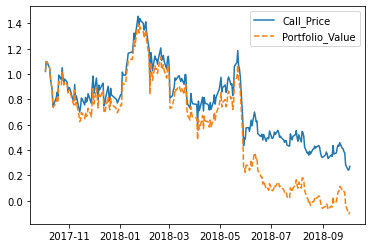

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",Time_to_Maturity,IV_Strike_6,Call_Price,Delta,poche_actions,poche_ZC,Portfolio_Value
0,2017-10-02,6.742,NaN,NaN,1.245722,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-03,6.955,NaN,NaN,1.242984,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-04,6.910,1.02096,0.59093,1.240246,0.145910,1.02096,0.829011,5.728464,-4.707504,1.020960
3,2017-10-05,7.006,1.09932,0.65885,1.237509,0.144838,1.09932,0.851435,5.965151,-4.864606,1.100545
4,2017-10-06,7.000,1.09306,0.65440,1.234771,0.144360,1.09306,0.851101,5.957707,-4.862270,1.095436
...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.260096,0.297915,0.37835,0.542451,3.269896,-3.204434,0.065462
253,2018-09-28,5.844,0.28498,0.19737,0.257358,0.298651,0.28498,0.460916,2.693593,-2.727942,-0.034349
254,2018-10-01,5.724,0.24261,0.16974,0.249144,0.312279,0.24261,0.411308,2.354328,-2.443986,-0.089658
255,2018-10-02,5.690,0.24491,0.17452,0.246407,0.328700,0.24491,0.403792,2.297574,-2.401217,-0.103643


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


################################# QUESTION 5 #################################


df = pd.read_excel('Données TD3.xlsx', parse_dates=['Date'], skiprows=2)
print(df.head())

K1 = 6
Vol = 0.20
Rf = 0.00
maturity_date = datetime(2018, 12, 31)
df['Time_to_Maturity'] = (maturity_date - df['Date']).dt.days / 365.25

################################# Calculs IV #################################

def black_scholes_call_price_for_IM(S, K, T, r, sigma):
    if T <= 0:
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def implied_vol_newton_raphson(S, K, T, r, market_price, tol=1e-6, max_iter=100):
    sigma = 0.2
    for i in range(max_iter):
        price = black_scholes_call_price_for_IM(S, K, T, r, sigma)
        vega = (S * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) 
                * np.sqrt(T))
        diff = price - market_price
        if abs(diff) < tol:
            return sigma
        sigma -= diff / vega  
    return np.nan

def calculate_iv(row, strike_column, K):
    if row["Time_to_Maturity"] > 0 and not pd.isna(row[strike_column]):
        S = row["Prix action"]
        market_price = row[strike_column]
        T = row["Time_to_Maturity"]
        try:
            return implied_vol_newton_raphson(S, K, T, Rf, market_price)
        except Exception as e:
            print(f"Erreur avec la ligne {row.name}: {e}")
            return np.nan
    else:
        return np.nan

df["IV_Strike_6"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6", 6), axis=1)



################################ Calculs delta ################################

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    delta = norm.cdf(d1)
    return call_price, delta

df['Call_Price'] = np.nan
df['Delta'] = np.nan

for i in range(len(df)):
    S = df.loc[i, 'Prix action']
    T = df.loc[i, 'Time_to_Maturity']
    if T > 0:
        call_price, delta = black_scholes_call_price(S, K1, T, Rf, df.at[i, 'IV_Strike_6'])
        df.at[i, 'Call_Price'] = call_price
        df.at[i, 'Delta'] = delta

df['poche_actions'] = np.nan
df['poche_ZC'] = np.nan
df['Portfolio_Value'] = np.nan


df['poche_actions'][2] = df['Delta'][2] * df['Prix action'][2]
df['poche_ZC'][2] = df['Call_Price'][2] - df['poche_actions'][2]
df['Portfolio_Value'][2] = df['Call_Price'][2]

for i in range(3, len(df)):
    df['poche_actions'][i] = df['Delta'][i] * df['Prix action'][i]
    df['Portfolio_Value'][i] = df['Portfolio_Value'][i-1] + df['Delta'][i - 1] * (df['Prix action'][i] - df['Prix action'][i - 1])
    df['poche_ZC'][i] = df['Portfolio_Value'][i] - df['poche_actions'][i]


print(df)

#plt.plot(df['Date'], df['poche_actions'], label='poche_actions')
#plt.plot(df['Date'], df['poche_ZC'], label='poche_ZC')
plt.plot(df['Date'], df['Call_Price'], label='Call_Price')
plt.plot(df['Date'], df['Portfolio_Value'], label='Portfolio_Value', linestyle='--')
plt.legend()
plt.show()

df

        Date  Prix action  Prix option strike 6  Prix option strike 6,5
0 2017-10-02        6.742                   NaN                     NaN
1 2017-10-03        6.955                   NaN                     NaN
2 2017-10-04        6.910               1.02096                 0.59093
3 2017-10-05        7.006               1.09932                 0.65885
4 2017-10-06        7.000               1.09306                 0.65440
          Date  Prix action  Prix option strike 6  Prix option strike 6,5  \
0   2017-10-02        6.742                   NaN                     NaN   
1   2017-10-03        6.955                   NaN                     NaN   
2   2017-10-04        6.910               1.02096                 0.59093   
3   2017-10-05        7.006               1.09932                 0.65885   
4   2017-10-06        7.000               1.09306                 0.65440   
..         ...          ...                   ...                     ...   
252 2018-09-27        6.028  

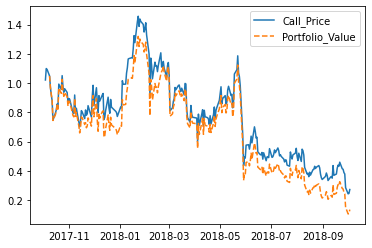

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


################################# QUESTION 5 #################################


df = pd.read_excel('Données TD3.xlsx', parse_dates=['Date'], skiprows=2)
print(df.head())

K1 = 6
K2 = 6.5
Vol = 0.20
Rf = 0.00
maturity_date = datetime(2018, 12, 31)
df['Time_to_Maturity'] = (maturity_date - df['Date']).dt.days / 365.25

################################# Calculs IV #################################

def black_scholes_call_price_for_IM(S, K, T, r, sigma):
    if T <= 0:
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def implied_vol_newton_raphson(S, K, T, r, market_price, tol=1e-6, max_iter=100):
    sigma = 0.2
    for i in range(max_iter):
        price = black_scholes_call_price_for_IM(S, K, T, r, sigma)
        vega = (S * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) 
                * np.sqrt(T))
        diff = price - market_price
        if abs(diff) < tol:
            return sigma
        sigma -= diff / vega  
    return np.nan

def calculate_iv(row, strike_column, K):
    if row["Time_to_Maturity"] > 0 and not pd.isna(row[strike_column]):
        S = row["Prix action"]
        market_price = row[strike_column]
        T = row["Time_to_Maturity"]
        try:
            return implied_vol_newton_raphson(S, K, T, Rf, market_price)
        except Exception as e:
            print(f"Erreur avec la ligne {row.name}: {e}")
            return np.nan
    else:
        return np.nan

df["IV_Strike_6"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6", 6), axis=1)

df["IV_Strike_6.5"] = df.apply(lambda row: calculate_iv(row, "Prix option strike 6,5", 6.5), axis=1)


################################ Calculs delta vega alpha beta ################################


def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    delta = norm.cdf(d1)
    vega = S * norm.pdf(d1) * np.sqrt(T)    

    return call_price, delta, vega


df['Delta1'] = np.nan
df['Vega1'] = np.nan
df['Delta2'] = np.nan
df['Vega2'] = np.nan
df['Alpha'] = np.nan
df['Beta'] = np.nan

for i in range(len(df)):
    S = df.loc[i, 'Prix action']
    T = df.loc[i, 'Time_to_Maturity']
    if T > 0:
        call_price1, delta1, vega1 = black_scholes_call_price(S, K1, T, Rf, df.at[i, 'IV_Strike_6'])
        df.at[i, 'Call_Price1'] = call_price1
        df.at[i, 'Delta1'] = delta1
        df.at[i, 'Vega1'] = vega1
        
        call_price2, delta2, vega2 = black_scholes_call_price(S, K2, T, Rf, df.at[i, 'IV_Strike_6.5'])
        df.at[i, 'Call_Price2'] = call_price2
        df.at[i, 'Delta2'] = delta2
        df.at[i, 'Vega2'] = vega2
        if i >= 4:
            df.at[i, 'Alpha'] = df.at[i, 'Delta1'] - (df.at[i, 'Delta2'] * df.at[i, 'Vega1'] / (df.at[i, 'Vega2'] * (df.at[i, 'IV_Strike_6.5']-df.at[i-1, 'IV_Strike_6.5'])/(df.at[i, 'IV_Strike_6']-df.at[i-1, 'IV_Strike_6'])))
            df.at[i, 'Beta'] = df.at[i, 'Vega1'] / (df.at[i, 'Vega2'] * (df.at[i, 'IV_Strike_6.5']-df.at[i-1, 'IV_Strike_6.5'])/(df.at[i, 'IV_Strike_6']-df.at[i-1, 'IV_Strike_6']))



df['poche_actions'] = np.nan
df['poche_option2'] = np.nan
df['poche_ZC'] = np.nan
df['Portfolio_Value'] = np.nan


df['poche_actions'][5] =  df['Alpha'][5] * df['Prix action'][5]
df['poche_option2'][5] = df['Beta'][5] * df['Call_Price2'][5]
df['Portfolio_Value'][5] = df['Call_Price1'][5] 
df['poche_ZC'][5] = df['Portfolio_Value'][5] - df['poche_actions'][5] - df['poche_option2'][5]


for i in range(6, len(df)):
    df['poche_actions'][i] = df['Alpha'][i] * df['Prix action'][i]
    df['Portfolio_Value'][i] = df['Portfolio_Value'][i-1] + df['Alpha'][i - 1] * (df['Prix action'][i] - df['Prix action'][i - 1]) + df['Beta'][i - 1] * (df['Call_Price2'][i] - df['Call_Price2'][i - 1])
    df['poche_option2'][i] = df['Beta'][i] * df['Call_Price2'][i]
    df['poche_ZC'][i] = df['Portfolio_Value'][i] - df['poche_actions'][i] - df['poche_option2'][i]


print(df)

#plt.plot(df['Date'], df['poche_actions'], label='poche_actions')
#plt.plot(df['Date'], df['poche_ZC'], label='poche_ZC')
plt.plot(df['Date'], df['Call_Price1'], label='Call_Price')
plt.plot(df['Date'], df['Portfolio_Value'], label='Portfolio_Value', linestyle='--')
#plt.plot(df['Date'], df['poche_option2'], label='poche_option2')
plt.legend()
plt.show()

df

